# Imports

In [ ]:
import shutil
import glob

In [ ]:
!git clone https://github.com/AlexeyAB/darknet
shutil.copyfile(r"/content/drive/MyDrive/Makefile", r"/content/darknet/Makefile")

Cloning into 'darknet'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 14751 (delta 0), reused 1 (delta 0), pack-reused 14748
Receiving objects: 100% (14751/14751), 13.31 MiB | 3.90 MiB/s, done.
Resolving deltas: 100% (10031/10031), done.


'/content/darknet/Makefile'

In [ ]:
%cd darknet
!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
           

In [ ]:
# Rename yolov3.cfg to yolov3-train.cfg
!cp cfg/yolov3.cfg cfg/yolov3-train.cfg
shutil.copyfile(r"/content/drive/MyDrive/yolov3-train.cfg", r"/content/darknet/cfg/yolov3-train.cfg")

'/content/darknet/cfg/yolov3-train.cfg'

Creating

*   obj.names - Contains class names listed (Eg: "license-plate")
*   obj.data - Contains other necessary details


In [ ]:
!echo -e 'license-plate' > data/obj.names 
!echo -e 'classes = 1\ntrain = data/train.txt\nvalid = data/test.txt\nnames = data/obj.names\nbackup = ../drive/MyDrive/yolo-license-plates' > data/obj.data

In [ ]:
shutil.copyfile(r"/content/drive/MyDrive/images.zip", r"/content/images.zip")
!mkdir data/obj 
!unzip ../images.zip -d data/obj

Archive:  ../images.zip
  inflating: data/obj/Cars1.txt      
  inflating: data/obj/Cars2.jpg      
  inflating: data/obj/Cars2.txt      
  inflating: data/obj/Cars5.jpg      
  inflating: data/obj/Cars5.txt      
  inflating: data/obj/Cars6.jpg      
  inflating: data/obj/Cars6.txt      
  inflating: data/obj/Cars7.jpg      
  inflating: data/obj/Cars7.txt      
  inflating: data/obj/Cars10.jpg     
  inflating: data/obj/Cars10.txt     
  inflating: data/obj/Cars11.jpg     
  inflating: data/obj/Cars11.txt     
  inflating: data/obj/Cars12.jpg     
  inflating: data/obj/Cars12.txt     
  inflating: data/obj/Cars13.jpg     
  inflating: data/obj/Cars13.txt     
  inflating: data/obj/Cars14.jpg     
  inflating: data/obj/Cars14.txt     
  inflating: data/obj/Cars15.jpg     
  inflating: data/obj/Cars15.txt     
  inflating: data/obj/Cars16.jpg     
  inflating: data/obj/Cars16.txt     
  inflating: data/obj/Cars17.jpg     
  inflating: data/obj/Cars17.txt     
  inflating: data/obj/Cars

In [ ]:
images_list = glob.glob('data/obj/*.jpg')
with open('data/train.txt', 'w') as f:
    f.write('\n'.join(images_list))

## Download Weights

In [ ]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2021-04-12 05:02:58--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   104MB/s    in 1.5s    

2021-04-12 05:02:59 (104 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## Start Training

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3-train.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
 total_bbox = 32149, rewritten_bbox = 0.000000 % 

 1926: 0.256033, 0.214041 avg loss, 0.000100 rate, 2.749693 seconds, 30816 images, 0.086483 hours left
Loaded: 0.000067 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000002, iou_loss = 0.000000, total_loss = 0.000002 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000003, iou_loss = 0.000000, total_loss = 0.000003 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000008, iou_loss = 0.000000, total_loss = 0.000008 
 total_bbox = 32149, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.000000), count: 1, class_loss = 0.000001, iou_loss = 0.000000, total_loss = 0.000001 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00

# Prediction

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 31 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,767 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [ ]:
import pytesseract
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
class LicensePlateDetector:
    def __init__(self, pth_weights: str, pth_cfg: str, pth_classes: str):
        self.net = cv2.dnn.readNet(pth_weights, pth_cfg)
        self.classes = []
        with open(pth_classes, 'r') as f:
            self.classes = f.read().splitlines()
        self.font = cv2.FONT_HERSHEY_PLAIN
        self.color = (255, 0, 0)
        self.coordinates = None
        self.img = None
        self.fig_image = None
        self.roi_image = []
        self.boxes = []
        
    def detect(self, img_path: str):
        orig = cv2.imread(img_path)
        self.img = orig
        img = orig.copy()
        height, width, _ = img.shape
        blob = cv2.dnn.blobFromImage(img, 1 / 255, (416, 416), (0, 0, 0), swapRB=True, crop=False)
        self.net.setInput(blob)
        output_layer_names = self.net.getUnconnectedOutLayersNames()
        layer_outputs = self.net.forward(output_layer_names)
        confidences = []
        class_ids = []

        for output in layer_outputs:
            for detection in output:
                scores = detection[5:]
                class_id = np.argmax(scores) 
                confidence = scores[class_id]
                if confidence > 0.2:
                    center_x = int(detection[0] * width)
                    center_y = int(detection[1] * height)
                    w = int(detection[2] * width)
                    h = int(detection[3] * height)
                    x = int(center_x - w / 2)
                    y = int(center_y - h / 2)

                    self.boxes.append([x, y, w, h])
                    confidences.append((float(confidence)))
                    class_ids.append(class_id)

        indexes = cv2.dnn.NMSBoxes(self.boxes, confidences, 0.2, 0.4)

        if len(indexes) > 0:
            for i in indexes.flatten():
                x, y, w, h = self.boxes[i]
                label = str(self.classes[class_ids[i]])
                confidence = str(round(confidences[i],2))
                cv2.rectangle(img, (x,y), (x + w, y + h), self.color, 5)
                cv2.putText(img, label + ' ' + confidence, (x - 100, y - 10), self.font, 3, (0, 0, 255), 3)
        self.fig_image = img
        self.coordinates = (x, y, w, h)
    
    def crop_plate(self):
        for coors in self.boxes:
            x, y, w, h = coors
            roi = self.img[y:y + h, x:x + w]
            self.roi_image.append(roi)
    
    def get_bboxes(self):
        return self.boxes

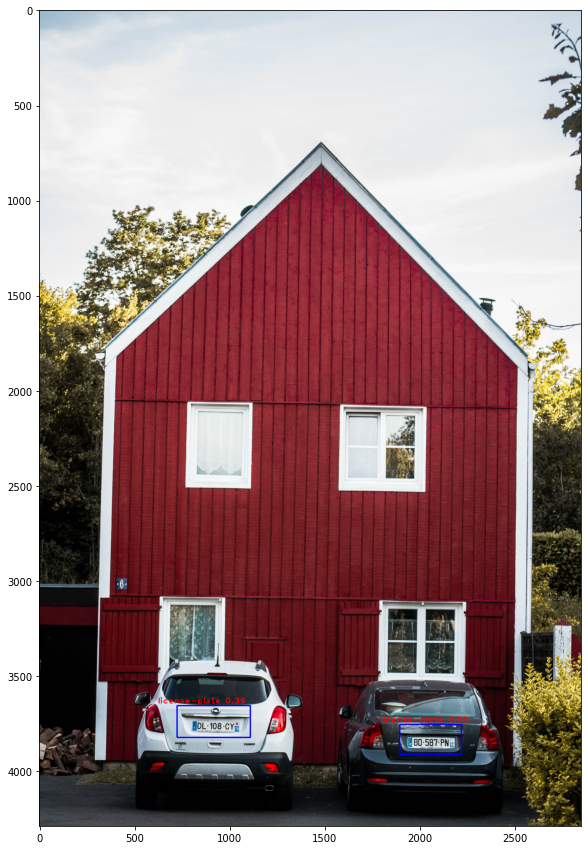

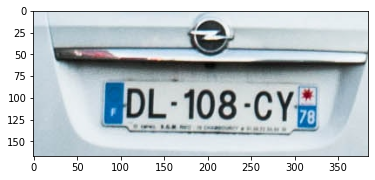

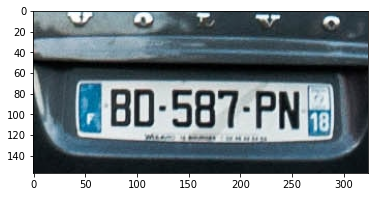

In [ ]:
path = r"/content/drive/MyDrive/yolo-testing"
lpd = LicensePlateDetector(pth_weights = os.path.join(path, 'yolov3-train_final.weights'), 
                           pth_cfg = os.path.join(path, 'yolov3-testing.cfg'), 
                           pth_classes = os.path.join(path, 'classes.txt'))

# Detect license plate
lpd.detect(r'/content/Test3.jpg')
cv2.imwrite(r'/content/detected.jpg', lpd.fig_image)

# Crop plate and show cropped plate
lpd.crop_plate()

# Shows Detected Images
plt.figure(figsize=(20, 15))
plt.imshow(cv2.cvtColor(lpd.fig_image, cv2.COLOR_BGR2RGB))
plt.show()

# Shows Plates Detected
for roi in lpd.roi_image:
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.show()

## Image Preprocessing

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


 =>
BOL -108-cve



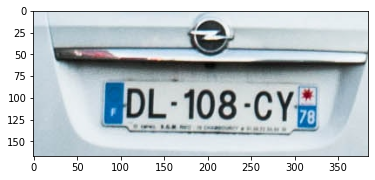


 80587 PW



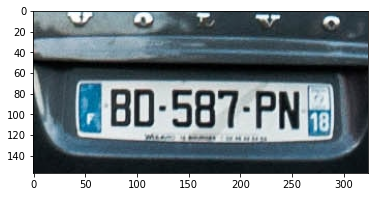

In [ ]:
for roi in lpd.roi_image:
    roi_gray = get_grayscale(roi)
    roi_rm_noise = remove_noise(roi_gray)
    roi_thresh = thresholding(roi_rm_noise)
    roi_opening = opening(roi_thresh)

    custom_config = r'--oem 3 --psm 6'
    extractedInformation = pytesseract.image_to_string(roi_opening, config=custom_config)
    print("\n", extractedInformation)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.show()